In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
def euler(f, t, y0, *args, **kwargs):
    """
    Eulerjeva metoda za reševanje sistema diferencialnih enačb: y' = f(t, y)
    
    :param f:  funkcija, ki vrne prvi odvod - f(t, y)
    :param t:  časovni vektor kjer računamo rešitev
    :param y0: začetna vrednosti
    :param args: dodatni argumenti funkcije f (brezimenski)
    :param kwargs: dodatni argumenti funkcije f (poimenovani)
    :return y: vrne np.array ``y`` vrednosti funkcije.
    """
    y = np.zeros_like(t)
    y[0] = y0        
    h = t[1]-t[0]
    for i in range(len(t)-1):
        y[i+1] = y[i] + f(t[i], y[i], *args, **kwargs) * h
    return y

In [3]:
def f_zračni_upor(t, y, g=9.81, m=1., c=0.5):
    return g-c*y/m

In [49]:
t = np.linspace(0, 5, 101)
t[:10]

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45])

In [50]:
sol = solve_ivp(f_zračni_upor, t_span=(t[0], t[-1]), y0=[0], t_eval=t)

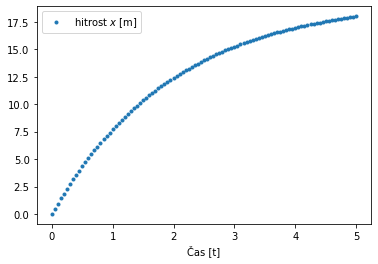

In [51]:
plt.plot(sol['t'], sol['y'][0], '.',label='hitrost $x$ [m]')
plt.xlabel('Čas [t]')
plt.legend();

In [53]:
t = np.linspace(0, 5, 2)

In [54]:
v = euler(f_zračni_upor,t, y0=0)

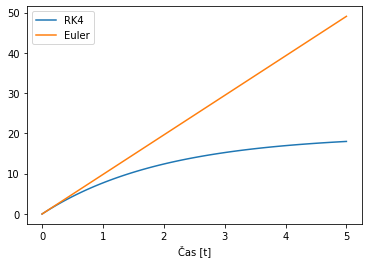

In [55]:
plt.plot(sol['t'], sol['y'][0], '-',label='RK4')
plt.plot(t, v, '-',label='Euler')
plt.xlabel('Čas [t]')
plt.legend();

In [56]:
from scipy.optimize import newton

V kodi komentiram kateri del bi bilo dobro posebej izpostaviti.

In [60]:
def euler_implicitna(f, t, y0, *args, **kwargs):
    """
    Implicitna Eulerjeva metoda za reševanje sistema diferencialnih enačb: y' = f(t, y)
    
    :param f:  funkcija, ki vrne prvi odvod - f(t, y)
    :param t:  časovni vektor kjer računamo rešitev
    :param y0: začetna vrednosti
    :param args: dodatni argumenti funkcije f (brezimenski)
    :param kwargs: dodatni argumenti funkcije f (poimenovani)
    :return y: vrne np.array ``y`` vrednosti funkcije.
    """
    y = np.zeros_like(t)
    y[0] = y0        
    h = t[1]-t[0]
    def find_zero(y_next):
        return y[i] + f(t[i], y_next, *args, **kwargs) * h -y_next
    for i in range(len(t)-1):
        ### GAŠPER: Ta del bi bilo dobro, da bi animirali
        sol = newton(lambda y_next: y[i] + f(t[i], y_next, *args, **kwargs) * h - y_next, x0=y[0])
        y[i+1] = sol        
    return y

In [61]:
vi = euler_implicitna(f_zračni_upor,t, y0=0)

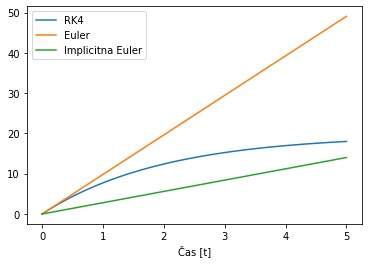

In [62]:
plt.plot(sol['t'], sol['y'][0], '-',label='RK4')
plt.plot(t, v, '-',label='Euler')
plt.plot(t, vi, '-',label='Implicitna Euler')
plt.xlabel('Čas [t]')
plt.legend();

Potem, ko bi bil en korak animiran in pojasnjen, bi pokazali več korakov..

In [63]:
t = np.linspace(0, 20, 101)
t[:10]

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8])

In [64]:
sol = solve_ivp(f_zračni_upor, t_span=(t[0], t[-1]), y0=[0], t_eval=t)

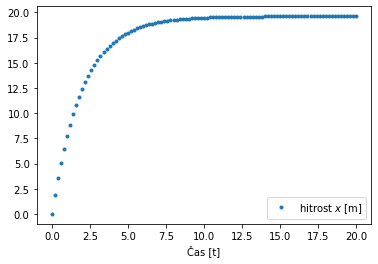

In [65]:
plt.plot(sol['t'], sol['y'][0], '.',label='hitrost $x$ [m]')
plt.xlabel('Čas [t]')
plt.legend();

In [66]:
t = np.linspace(0, 20, 8)

In [67]:
v = euler(f_zračni_upor,t, y0=0)

In [70]:
vi = euler_implicitna(f_zračni_upor,t, y0=0)

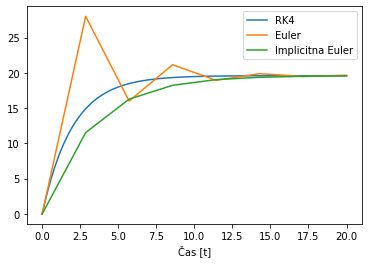

In [71]:
plt.plot(sol['t'], sol['y'][0], '-',label='RK4')
plt.plot(t, v, '-',label='Euler')
plt.plot(t, vi, '-',label='Implicitna Euler')
plt.xlabel('Čas [t]')
plt.legend();